## **SALES PREDICTION USING PYTHON**

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

Download Dataset : https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [31]:
# import necessaries libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('/content/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
#dropping the first column we dont need
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


<Axes: >

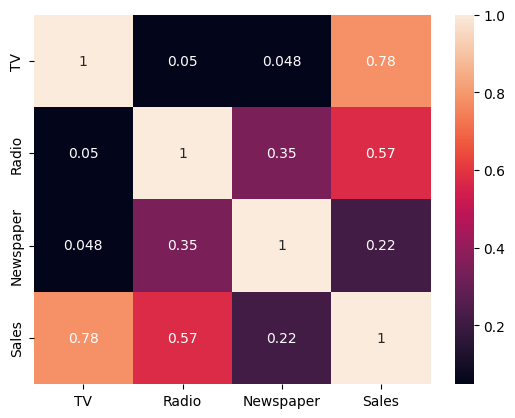

In [9]:
#using Heat map
sns.heatmap(df.corr(),annot=True)

<Figure size 4000x1000 with 0 Axes>

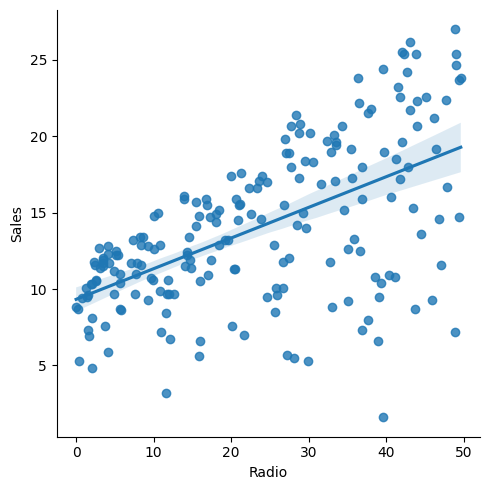

In [47]:
plt.figure(figsize=(40,10))
sns.lmplot(data=df,x='Radio',y='Sales')

<Figure size 4000x1000 with 0 Axes>

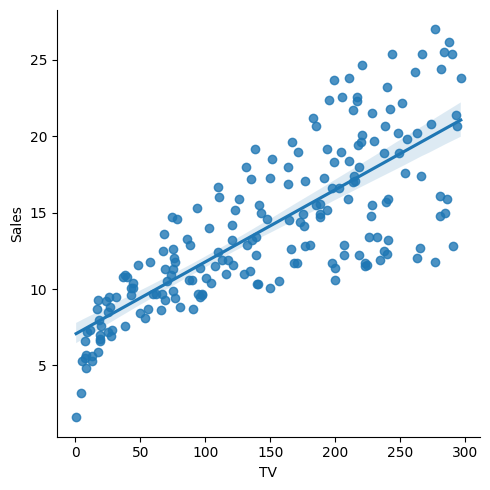

In [48]:
plt.figure(figsize=(40,10))
sns.lmplot(data=df,x='TV',y='Sales')

<Figure size 4000x1000 with 0 Axes>

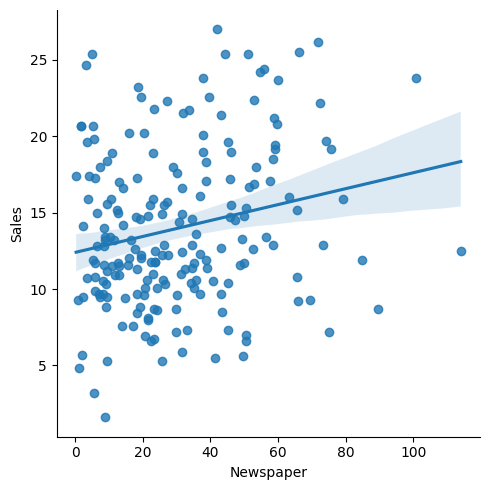

In [49]:
plt.figure(figsize=(40,10))
sns.lmplot(data=df,x='Newspaper',y='Sales')

In [50]:
#fitting data into train and test model
x = df[['TV','Newspaper','Radio']]
y = df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [51]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [60]:
print("model_intercept:" ,model.intercept_)
print("model_coefficient:",model.coef_)

'''
Without further context or information about the specific model and data being used, 
it is difficult to draw specific conclusions. However, these values can provide insights into the model's
overall performance and the relative importance of the independent variables in predicting the dependent variable. 
The sign and magnitude of the coefficients can help determine which variables have a positive or negative impact on the outcome,
and the intercept provides a baseline prediction value.
'''

model_intercept: 3.346786900538916
model_coefficient: [0.04397002 0.00022637 0.18450374]


"\nWithout further context or information about the specific model and data being used, \nit is difficult to draw specific conclusions. However, these values can provide insights into the model's\noverall performance and the relative importance of the independent variables in predicting the dependent variable. \nThe sign and magnitude of the coefficients can help determine which variables have a positive or negative impact on the outcome,\nand the intercept provides a baseline prediction value.\n"

In [59]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(20)

,Actual,Predict
0,14.6,14.237534
1,8.4,7.689696
2,8.7,7.382280
3,22.2,21.129618
4,11.7,12.277582
5,17.6,18.443098
6,11.8,11.932105
7,10.9,9.713670
8,9.7,9.037722
9,13.3,13.731411


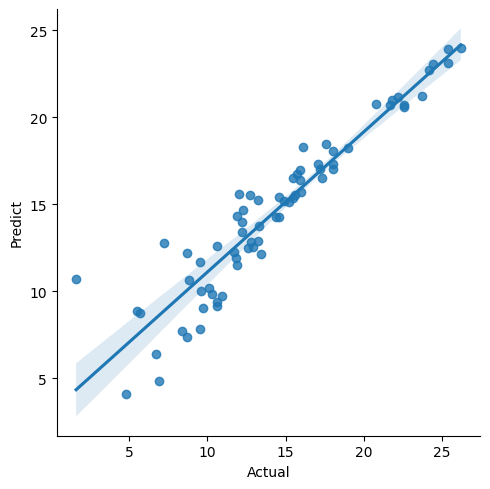

In [54]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")

In [55]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.3339538501934836
Mean_squared_error: 3.764291125346272
Squre_Mean_absolute_error: 1.1549691988072597
r2_score: 0.8729454211359226


**R2 SCORE**:

An R2 score of 0.87 is quite good, but it does not indicate a perfect fit. The R2 score ranges from 0 to 1, where 1 represents a perfect fit and 0 represents a model that explains none of the variance in the dependent variable.

With an R2 score of 0.87, it means that approximately 87% of the variance in the dependent variable (y) can be explained by the independent variables in the model. This suggests that the model is performing well and capturing a significant portion of the relationship between the variables, but there is still some unexplained variance.